In [1]:
from skimage import io
from skimage.transform import rescale
from matplotlib import pyplot as plt

import boto3

import numpy as np

from PIL import Image, ImageDraw, ImageColor, ImageOps


## AWS credentials and service selection

In [2]:
## Selecting profile credentials
session = boto3.session.Session(profile_name='aws_academy')

## Selecting AWS Service
rekognition = session.client(service_name='rekognition')

## Text Detection [docs](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html#Rekognition.Client.detect_text)

In [3]:
!ls text_detection

auto-1.png  auto-2.jpg	auto-3.jpg


In [4]:
img_folder = 'text_detection'

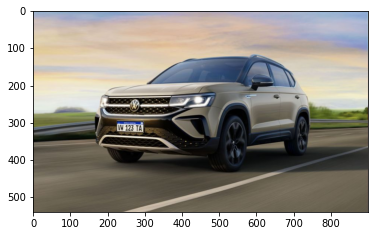

In [6]:
filename = f'{img_folder}/auto-3.jpg' 

carimage = io.imread(filename)

plt.imshow(carimage)


In [7]:
# Procedemos a llamar a la funcion detect_text
with open(filename, 'rb') as car_image:
    response = rekognition.detect_text(Image={
                                                'Bytes': car_image.read()
                                             }
                                      )
# https://docs.aws.amazon.com/rekognition/latest/dg/images-bytes.html

In [17]:
str(response)[:1024]

"{'TextDetections': [{'DetectedText': '- -', 'Type': 'LINE', 'Id': 0, 'Confidence': 78.05516052246094, 'Geometry': {'BoundingBox': {'Width': 0.03732066974043846, 'Height': 0.013156426139175892, 'Left': 0.2696422338485718, 'Top': 0.549749493598938}, 'Polygon': [{'X': 0.27033987641334534, 'Y': 0.549749493598938}, {'X': 0.30696290731430054, 'Y': 0.5521177649497986}, {'X': 0.306265264749527, 'Y': 0.5629059076309204}, {'X': 0.2696422338485718, 'Y': 0.560537576675415}]}}, {'DetectedText': 'VW 123 TA', 'Type': 'LINE', 'Id': 1, 'Confidence': 86.5503158569336, 'Geometry': {'BoundingBox': {'Width': 0.07265625149011612, 'Height': 0.0341796875, 'Left': 0.251953125, 'Top': 0.5634765625}, 'Polygon': [{'X': 0.251953125, 'Y': 0.5634765625}, {'X': 0.3246093690395355, 'Y': 0.5634765625}, {'X': 0.3246093690395355, 'Y': 0.59765625}, {'X': 0.251953125, 'Y': 0.59765625}]}}, {'DetectedText': '-', 'Type': 'WORD', 'Id': 2, 'ParentId': 0, 'Confidence': 67.60771942138672, 'Geometry': {'BoundingBox': {'Width': 0.

*** VW 123 TA ***


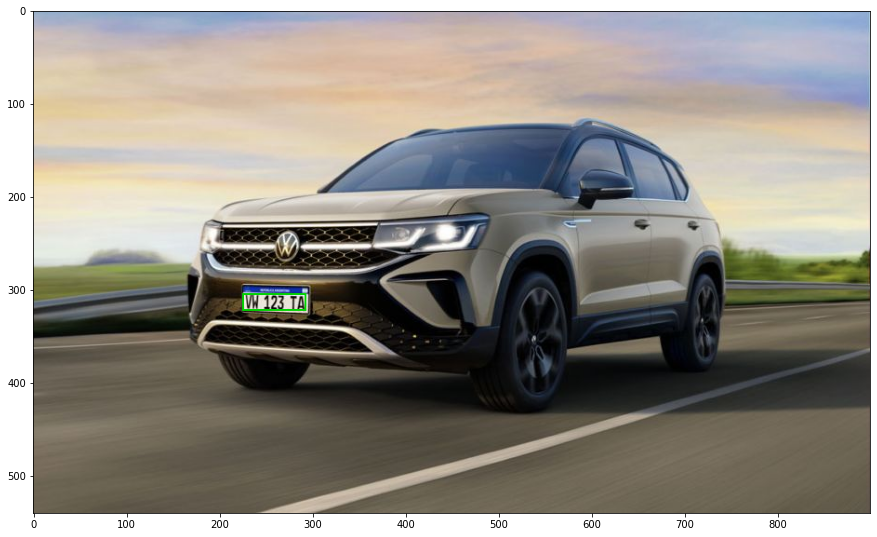

In [15]:
plt.figure(figsize=(15,15))
img = Image.open(filename)
imgWidth, imgHeight = img.size

draw = ImageDraw.Draw(img)
if response['ResponseMetadata']['HTTPStatusCode'] == 200:
    for detection in response['TextDetections']:
        if detection['Id'] == 1:
            print(f"*** {detection['DetectedText']} ***")
            box = detection['Geometry']['BoundingBox']
            left = imgWidth * box['Left']
            top = imgHeight * box['Top']
            width = imgWidth * box['Width']
            height = imgHeight * box['Height']

    points = (
                (left,top), 
                (left+width,top),
                (left+width,top+height), 
                (left,top+height), 
                (left,top),
            )
    
    draw.line(points, fill='#00d400', width=2)

plt.imshow(img);


# https://docs.aws.amazon.com/rekognition/latest/dg/images-displaying-bounding-boxes.html